In [85]:
import pandas as pd
df = pd.read_csv('heart_2020_cleaned.csv')
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Convert none numeric values to numeric values

In [86]:
binary_columns = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'PhysicalActivity', 'Asthma',
        'KidneyDisease', 'SkinCancer'
    ]
# Map Yes/No to 1/0
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

def get_age_group_10_years(age_category):
   """
   Takes the original age category and returns a new 10-year category

   Parameters:
   age_category (str): Original age category (e.g. "18-24", "25-29" etc.)

   Returns:
   str: New age category ("18-29", "30-39" etc.)
   """
   if age_category in ['18-24', '25-29']:
       return '18-29'
   elif age_category in ['30-34', '35-39']:
       return '30-39'
   elif age_category in ['40-44', '45-49']:
       return '40-49'
   elif age_category in ['50-54', '55-59']:
       return '50-59'
   elif age_category in ['60-64', '65-69']:
       return '60-69'
   elif age_category in ['70-74', '75-79']:
       return '70-79'
   elif age_category == '80 or older':
       return '80+'
   else:
       return 'Unknown'

# Add new age group column
df['AgeCategory'] = df['AgeCategory'].apply(get_age_group_10_years)


#display(df)

Remove outliers values

In [87]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_clean = df.copy()
# # Calculate IQR and bounds for each numerical column
# for column in ['BMI', 'PhysicalHealth', 'MentalHealth']:
#     Q1 = df_clean[column].quantile(0.25)
#     Q3 = df_clean[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#
#     df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# Handle SleepTime separately with fixed bounds (3-16 hours)
df = df[(df['SleepTime'] >= 1) & (df['SleepTime'] <= 16)]

Basic histogram of the prediction column

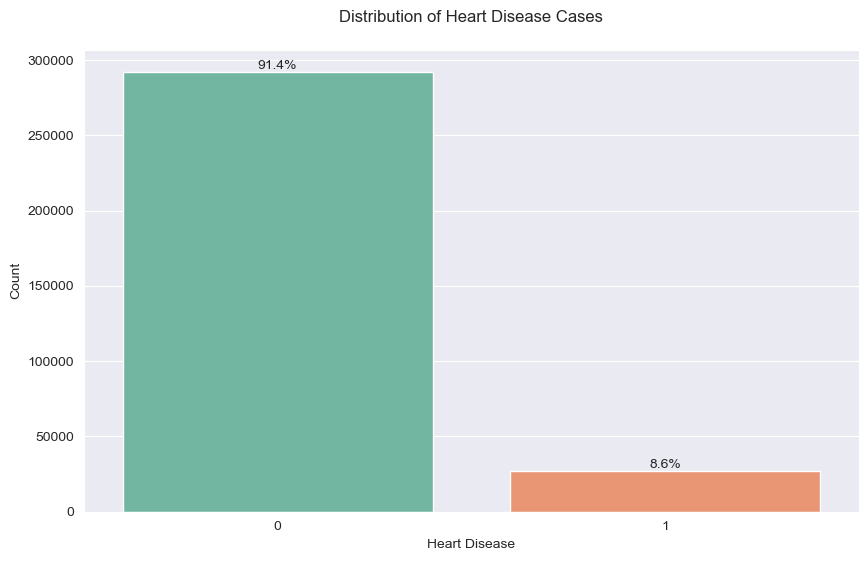

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(10, 6))

# Create histogram/count plot with updated syntax
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)

# Calculate percentages
total = len(df['HeartDisease'])
percentages = df['HeartDisease'].value_counts(normalize=True) * 100

# Add percentage labels on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, df['HeartDisease'].value_counts()[i],
             f'{percentage:.1f}%',
             horizontalalignment='center',
             verticalalignment='bottom')

# Customize the plot
plt.title('Distribution of Heart Disease Cases', pad=20)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show plot
plt.show()

Distribution of Heart Disease Cases in different Races

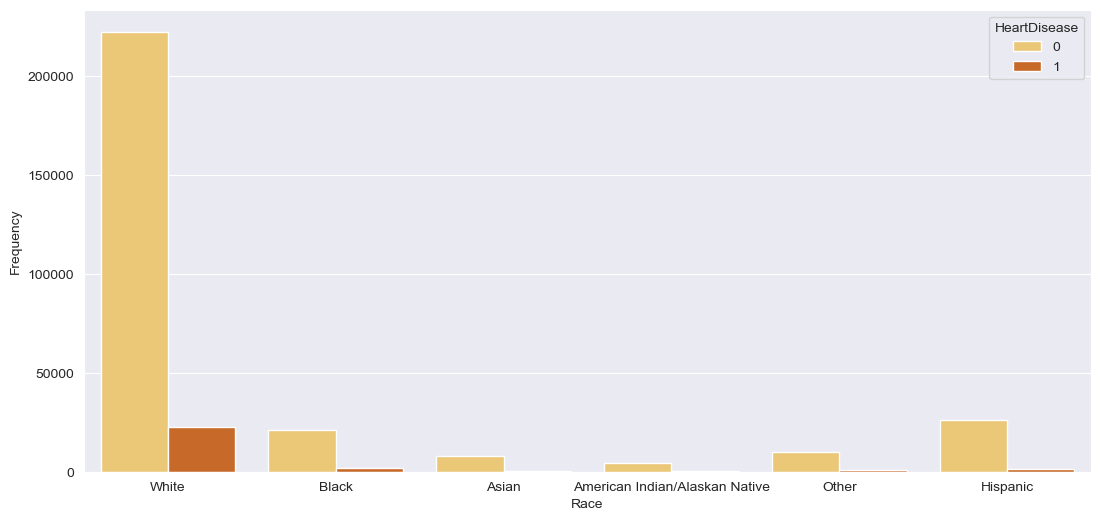

In [89]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='Race', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

Distribution of Heart Disease Cases in different Sex

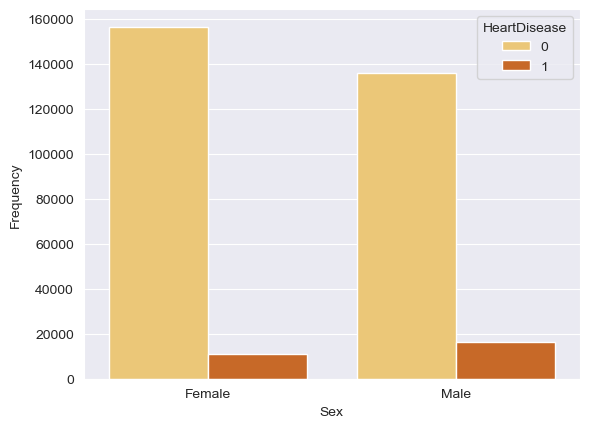

In [90]:
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

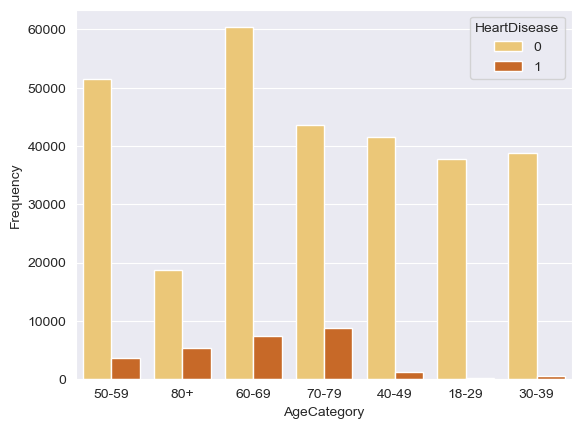

In [91]:
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

In [92]:
# Set the option at the beginning
pd.set_option('future.no_silent_downcasting', True)
df_copy = df.copy()
# Sex mapping
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0})

# Age mapping
age_map = {
    '18-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80+': 7
}
df_copy['AgeCategory'] = df_copy['AgeCategory'].replace(age_map)

# Race mapping
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian': 2,
    'American Indian/Alaskan Native': 3,
    'Hispanic': 4,
    'Other': 5
}
df_copy['Race'] = df_copy['Race'].replace(race_mapping)

# Diabetic mapping
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df_copy['Diabetic'] = df_copy['Diabetic'].replace(diabetic_mapping)

# General Health mapping
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df_copy['GenHealth'] = df_copy['GenHealth'].replace(genhealth_mapping)
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0}).astype(int)
display(df_copy)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,4,0,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,7,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,5,0,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,3,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,5,4,3,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,2,4,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,3,4,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,4,0,0,2,12.0,0,0,0


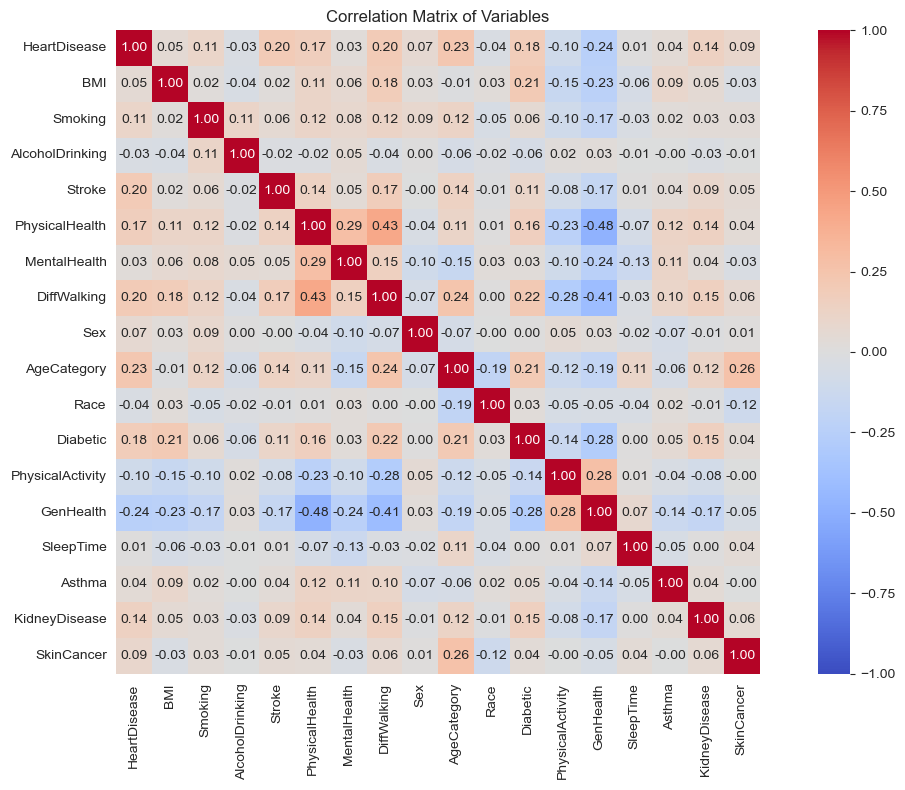

In [93]:
# Create correlation matrix
correlation_matrix = df_copy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',          # Show 2 decimal places
            square=True,         # Make the plot square-shaped
            vmin=-1, vmax=1)     # Set the range of values

plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()